### 1. Problème

https://www.kaggle.com/datasets/mssmartypants/paris-housing-price-prediction

### Import Libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
data = pd.read_csv('ParisHousing.csv')

In [9]:
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [11]:
data.shape

(10000, 17)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

<Axes: xlabel='squareMeters', ylabel='price'>

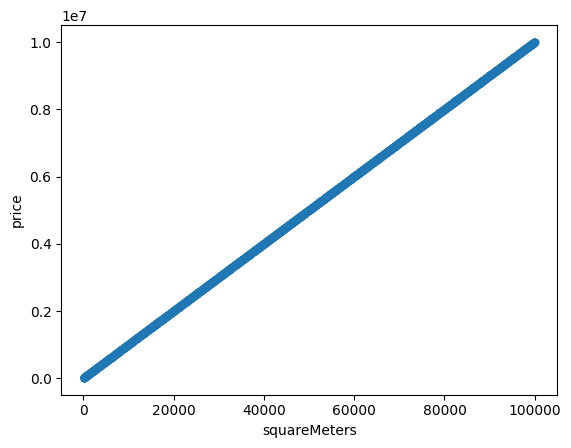

In [17]:
data.plot(x='squareMeters',y= 'price', kind='scatter')

In [36]:
X = data.drop('price', axis=1)
y = data.price
print(X.shape)
print(y.shape)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

(10000, 16)
(10000,)


In [38]:
print(X_train.shape)
print(y_train.shape)
X_train.head()
#y_train.head()

(8000, 16)
(8000,)


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
7389,21229,44,1,0,82,23820,9,6,2020,0,1,5610,4059,419,1,9
9275,21364,73,1,1,42,64233,9,1,1996,1,1,370,6597,157,0,3
2995,92877,22,1,1,57,7054,8,3,1993,0,0,5428,5905,170,1,8
5316,57132,74,1,0,70,23266,8,8,2014,0,1,671,6361,832,1,10
356,25269,88,0,0,92,86720,6,7,2019,1,1,3464,5175,693,1,1


In [37]:
regressor = LinearRegression()
regressor.fit(X_train[['squareMeters']], y_train)

print(regressor.coef_)
print(regressor.intercept_)

[100.00006696]
6439.589253270067


In [40]:
y_pred = regressor.predict(X_test[['squareMeters']])
y_pred.shape

(2000,)

In [41]:
print(r2_score(y_test, y_pred))

0.9999986723135196
